

# Project: Investigate a Dataset - [TMDB-Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Coloumns names ['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj']

### Question(s) for Analysis
Which genre are most popular?
Which genre brought the most revenue over the years?
Are higher budgets associated with bringing higher revenue ?  
How The movies budgets differed through the years ?
Does high votes means high revenue?
Which Years have the highest count of films ?
Which Genres with the highest number of films ?
What is the average length of a movie ?


In [1]:
#Importing the libraries that i'll use 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
df= pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Note: Cast,production companies and Genre columns : The entries are separated with | 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.shape

(10866, 21)

In [8]:
#as we can see :- Homepage,Tagline,Keywords and production companies colomns are missing a lot of values also director , cast, imdb_id 
#release date is not in date time dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
#Counting the number of Valued 0 entries in each column
sum(df['budget'] == 0),sum(df['revenue'] == 0),sum(df['runtime'] == 0)

(5696, 6016, 31)

In [11]:
# Counting the num of Duplicated Rows 
sum(df.duplicated())

1


### Data Cleaning

 

In [12]:
#Deleting the duplicated one 
df.drop_duplicates(inplace=True)


In [13]:
df.shape

(10865, 21)

In [14]:
#Dropping Unnecessary and colomns
df.drop(['homepage','tagline','keywords','production_companies','id', 'imdb_id','original_title','budget_adj',
       'revenue_adj'],axis=1,inplace=True)

In [15]:
#turning the 0 values to null
df.replace(0,np.nan,inplace=True)


In [16]:
#dropped Null containing rows
df.dropna(inplace=True)

In [17]:
df.shape

(3849, 12)

In [18]:
# Values were separated by "|" so we have to separate them , and expand=True Gives us the first genre in a column
df['genres']=df['genres'].str.split('|',expand=True)

In [19]:
#Checking for genre values
df.head()

,popularity,budget,revenue,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action,6/9/15,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action,5/13/15,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure,3/18/15,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action,12/15/15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action,4/1/15,2947,7.3,2015


In [20]:
df.columns

Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'overview',
       'runtime', 'genres', 'release_date', 'vote_count', 'vote_average',
       'release_year'],
      dtype='object')

In [21]:
#Turning the type tp Datetme type
df['release_date']=pd.to_datetime(df['release_date'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 12 columns):
popularity      3849 non-null float64
budget          3849 non-null float64
revenue         3849 non-null float64
cast            3849 non-null object
director        3849 non-null object
overview        3849 non-null object
runtime         3849 non-null float64
genres          3849 non-null object
release_date    3849 non-null datetime64[ns]
vote_count      3849 non-null int64
vote_average    3849 non-null float64
release_year    3849 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 390.9+ KB


In [23]:
#implementing a user-defined function to avoid writing repetitive code
def groupby_mean(c1,c2):
    mgb = df.groupby(c1)[c2].mean()
    return mgb

<a id='eda'></a>
## Exploratory Data Analysis




### 1) Which genres are most popular  ?


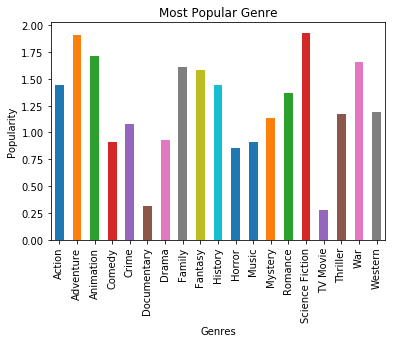

In [24]:
mgp= groupby_mean('genres','popularity').plot(kind='bar',title='Most Popular Genre');
mgp.set_xlabel("Genres")
mgp.set_ylabel("Popularity");

### Conclusions
Data showed that the most popular genre is:Science-Fiction 
while Adventure, animation and war come after it 

### 2) Which genres brought the most revenue over the years?

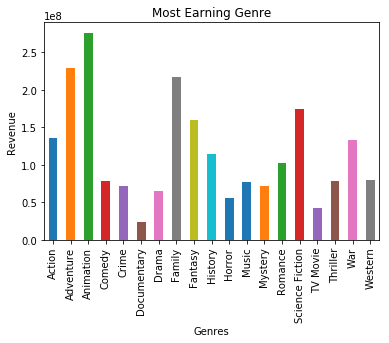

In [25]:
mgr=groupby_mean('genres','revenue').plot(kind='bar',title='Most Earning Genre');
mgr.set_xlabel("Genres")
mgr.set_ylabel("Revenue");


### Conclusions
The genre which brought the most revenue was :Animation

### 3) Are higher budgets associated with bringing higher revenue ?  


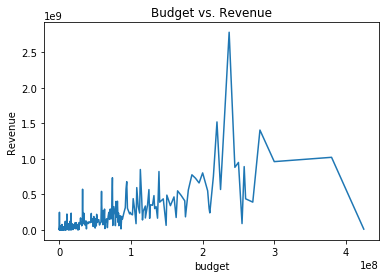

In [26]:
mbr=groupby_mean("budget","revenue").plot(kind='line',title='Budget vs. Revenue');
mbr.set_ylabel("Revenue");

### Conclusion
Data showed no mentionable correlation between spending high budget and getting higher revenues

### 4) How The movies budgets differed through the years ?


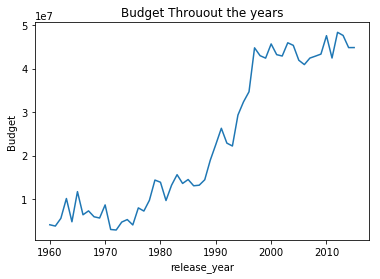

In [27]:
myb=groupby_mean("release_year","budget").plot(kind='line',title='Budget Throuout the years');
myb.set_ylabel("Budget");

### Conclusion
Data shows that over the years the budget of films increases

###  5) Does high votes represent high revenue?

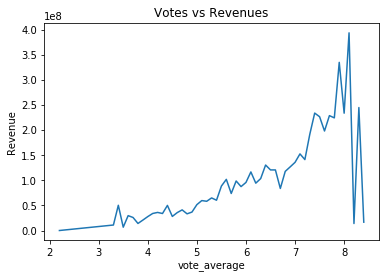

In [28]:
mvr=groupby_mean("vote_average","revenue").plot(kind='line',title='Votes vs Revenues');
mvr.set_ylabel("Revenue");

### Conclusion
Data showed that films with high revenues mostly get high vote ratings.

### 6) Which Year has the highest count of films?

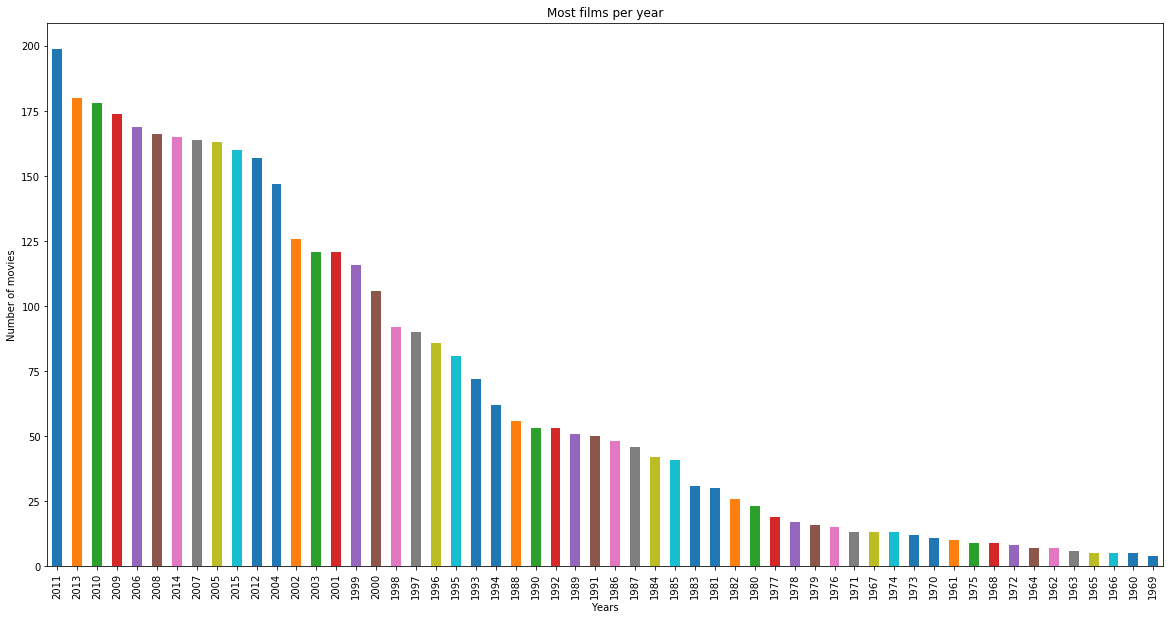

In [29]:
cr=df['release_year'].value_counts().plot(kind='bar',figsize=(20,10),title='Most films per year')
cr.set_xlabel("Years")
cr.set_ylabel("Number of movies");

### Conclusion
2011 is when the film industry produced the highest count of films

### 7) Which Genre has the highest number of films?


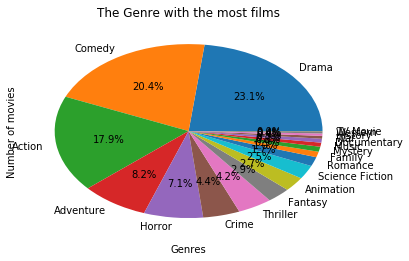

In [31]:
cg=df['genres'].value_counts().plot(kind='pie',autopct='%1.1f%%',title='The Genre with the most films')
cg.set_xlabel("Genres")
cg.set_ylabel("Number of movies");

### Conclusion
Drama was the genre with the highest number of films, the second most is Comedy while the third was action

### 8) What is the average length of a movie ?

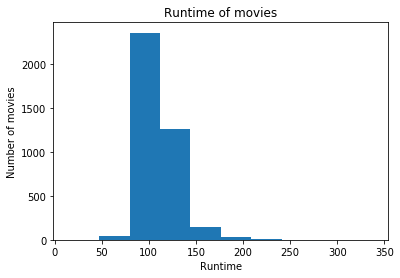

In [32]:
hr=df['runtime'].plot(kind='hist',title='Runtime of movies')
hr.set_xlabel("Runtime")
hr.set_ylabel("Number of movies");

In [33]:
# Descriptive statistics of the runtime column
df['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Conclusion
The average film length is 106 minutes while the longest film is 338 minutes and the shortest is 15 minutes.

<a id='conclusions'></a>

## Limitaions
- Lots of missing data
- Outliers were found 
- currency isn't specified , which may lead to misleading intepretaion of data 


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0